En este Notebook se realiza una EDA para todas y cada una de las variables. Eso sí, hay que tener en cuenta que en este notebook no vamos a ciegas, ya que hemos explorado visualmente la distribución de las variables con las funciones de __CosasGuaysDeEDA.ipynb__

De momento ya sabemos como rellenar las provincias faltantes, que en antigüedad tenemos un piso del **2088**, que en la variable precio de venta tenemos precio de alquiler y de venta, y que hay pisos con más metros útiles que totales. Por ello vamos a analizar las variables detenidamente para detectar esos Outliers y los valores atipicos.

Notas para el lector: Las nuevas variables definidas por nosotros están denominadas por el formato **'PV\_.....'**. Donde PV significa _Personal Variable_

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_table('Modelar_UH2019.txt', sep = '|', dtypes = {'HY-cod_postal': str})

In [5]:
def PlotCantNaN(df, var):
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(221)
    plt.title(var, fontsize=12)
    
    # NaNs vs no NaNs
    cant_nans = np.sum(df.isnull())
    cant_no_nans = df.shape[0] - cant_nans
    
    plt.title(var, fontsize=12)
    plt.bar([1,2],[cant_nans, cant_no_nans])
    plt.text(1, cant_nans+200, cant_nans, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='black', 
                                                                                                    size = 'x-large',
                                                                                                    style = 'italic'))
    plt.text(2, cant_no_nans+200, cant_no_nans, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='black', 
                                                                                                    size = 'x-large',
                                                                                                    style = 'italic'))
    plt.xticks([1,2],['Na', 'No Na'])
    plt.ylim(0,10000)
    plt.show()

In [220]:
def PlotValueCounts(v, rotation = 0):
    '''
    Función que realiza un bar plot de count de las variables indicando en el eje x cada clase
    v --> Un elemento resultado de un df[var].value_counts()
    '''
    plt.bar(range(len(v)), v.values)
    plt.xticks(range(len(v.index)),v.index, rotation=rotation)
    plt.show()

# HY_cod_postal

Cuantos NaNs hay?

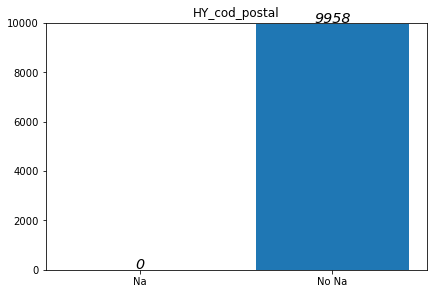

In [7]:
var = 'HY_cod_postal'
datos = df.HY_cod_postal
PlotCantNaN(datos, var)

Dado que es una variable categórica (Con muchas categorías) vamos a ver cuantas clases  hay por cada código.

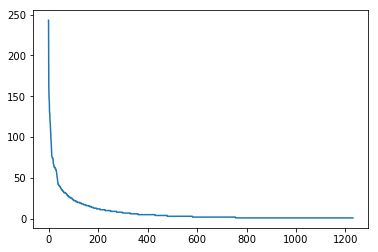

In [12]:
valores = datos.value_counts()
plt.plot(range(len(valores)), valores.values)
plt.show()

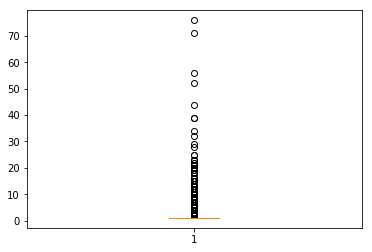

In [117]:
plt.boxplot(valores.values)
plt.show()

In [13]:
datos.value_counts()

4740     243
4738     164
12593    148
29200    145
4720     130
4007     129
12540    120
30600    117
4610     109
46600    101
18230     96
46183     92
4700      84
46410     77
47015     76
46980     75
4800      74
12130     74
30820     74
4630      69
30500     67
4600      66
30170     64
3440      63
4620      63
12550     63
12530     62
30700     62
47300     62
12006     60
        ... 
8319       1
30836      1
13120      1
7005       1
8279       1
8271       1
22600      1
41007      1
8231       1
17310      1
18410      1
43763      1
21220      1
22728      1
8711       1
43718      1
35450      1
12909      1
45653      1
43590      1
28982      1
8703       1
18730      1
8914       1
18810      1
12613      1
16707      1
47420      1
12589      1
8188       1
Name: HY_cod_postal, Length: 1231, dtype: int64

In [17]:
print('Hay {} registros con solo 1 código postal'.format(np.sum(datos.value_counts()==1)))
print('Tenemos un total de {} registros distintos.'.format(len(datos.unique())))

Hay 475 registros con solo 1 código postal
Tenemos un total de 1231 registros distintos.


Por lo al tener 1231 registros distintos, tenemos que está muy descompensado por el código postal.

# HY_provincia

Análisis de la variable de provincia.

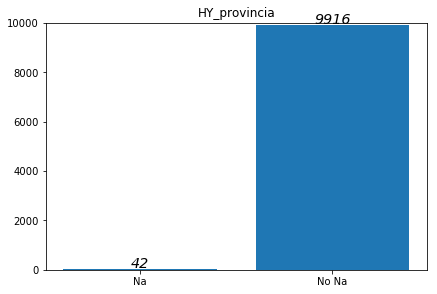

In [18]:
var = 'HY_provincia'
datos = df[var]
PlotCantNaN(datos, var)

Rellenamos los 42 valores faltantes con el siguiente procedimiento:
+ 1: Transformamos el tipo de lectura de nuestro df para que la variable _HY_provincia_ sea del tipo categórica, y no numérica.
+ 2: Empleamos un diccionario con todos los códigos postales de españa con el cual rellenamos los valores faltantes.

In [19]:
def ArreglarProvincias(df):
    #Diccionario de los códigos postales. 'xxddd' --> xx es el código asociado a la provincia
    diccionario_postal = {'02':'Albacete',
    '03':'Alicante',
    '04':'Almería',
    '01':'Álava',
    '33':'Asturias',
    '05':'Avila',
    '06':'Badajoz',
    '07':'Baleares', 
    '08':'Barcelona',
    '48':'Bizkaia',
    '09':'Burgos',
    '10':'Cáceres',
    '11':'Cádiz',
    '39':'Cantabria',
    '12':'Castellón',
    '13':'Ciudad Real',
    '14':'Córdoba',
    '15':'A Coruña',
    '16':'Cuenca',
    '20':'Gipuzkoa',
    '17':'Gerona',
    '18':'Granada',
    '19':'Guadalajara',
    '21':'Huelva',
    '22':'Huesca',
    '23':'Jaén',
    '24':'León',
    '25':'Lérida',
    '27':'Lugo',
    '28':'Madrid',
    '29':'Málaga',
    '30':'Murcia',
    '31':'Navarra',
    '32':'Ourense',
    '34':'Palencia',
    '35':'Las Palmas',
    '36':'Pontevedra',
    '26':'La Rioja',
    '37':'Salamanca',
    '38':'Tenerife',
    '40':'Segovia',
    '41':'Sevilla',
    '42':'Soria',
    '43':'Tarragona',
    '44':'Teruel',
    '45':'Toledo',
    '46':'Valencia',
    '47':'Valladolid',
    '49':'Zamora',
    '50':'Zaragoza',
    '51':'Ceuta',
    '52':'Melilla'}
    
    # Los códigos postales que nos faltan
    codigos_postales = df.loc[df.HY_provincia.isnull()].HY_cod_postal
    
    # Recorremos la pareja index, value
    for idx, cod in zip(codigos_postales.index, codigos_postales):
        # Del cod solo nos interesan los dos primeros valores para la provincia.
        df.loc[idx,'HY_provincia'] = diccionario_postal[cod[:2]]
        
    # Devolvemos el df de las provincias
    return df

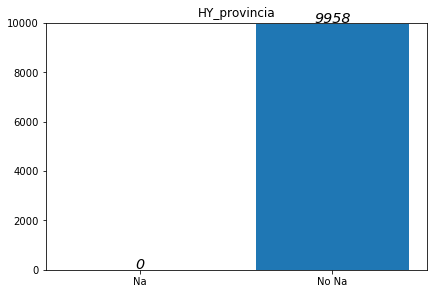

In [21]:
df = ArreglarProvincias(df)

# Comprobamos que todo va bien
var = 'HY_provincia'
datos = df[var]
PlotCantNaN(datos, var)

Veamos como se distribuye la variable:

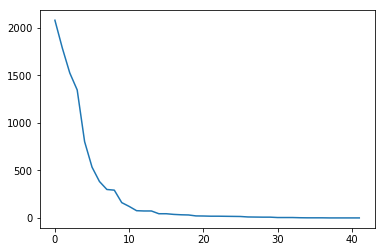

In [22]:
valores = datos.value_counts()
plt.plot(range(len(valores)), valores.values)
plt.show()

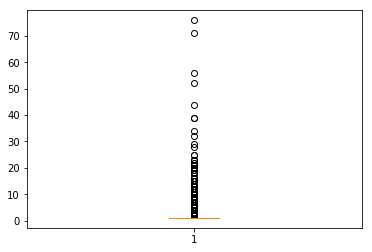

In [118]:
plt.boxplot(valores.values)
plt.show()

In [23]:
datos.value_counts()

Valencia       2080
Almería        1787
Murcia         1526
Castellón      1347
Alicante        803
Málaga          535
Granada         384
Valladolid      300
Tarragona       293
Barcelona       162
Las Palmas      122
Madrid           77
Baleares         74
Cádiz            74
Albacete         45
La Rioja         45
Gerona           38
Soria            34
Córdoba          32
Teruel           22
Cuenca           21
Palencia         19
Guadalajara      19
León             18
Toledo           17
A Coruña         16
Sevilla          11
Huelva           10
Zaragoza          9
Avila             9
Lérida            5
Pontevedra        5
Ciudad Real       5
Huesca            3
Tenerife          2
Burgos            2
Badajoz           2
Segovia           1
Cáceres           1
Navarra           1
Jaén              1
Asturias          1
Name: HY_provincia, dtype: int64

Vemos que existen unas clases principales con unos mil valores, y luego el resto se presentan en minoría, por ello vamos a realizar la siguiente transformación:
+ Valencia, Almería, Murcia, Castellón los dejamos igual.
+ El resto lo cambiamos por 'Otros'.


In [27]:
def ModificarProvincias(ListaProvincias, ClasesNoTocar):
    '''
    ListaProvincias --> nuestra variable HY_provincia
    ClasesNoTocar --> Clases que se quedan igual
    '''
    # Definimos la función que dado x, decide a que grupo pertenece
    def estructurar_provincias(x, ClasesNoTocar):
        '''
        Funcion que asocia a x (Nombre de provincia) su clase
        '''
        # Lista de clases que nos queremos quedar
        if x in ClasesNoTocar:
            return x
        else:
            return 'Otros'
    # Devolvemos la transformación
    return ListaProvincias.apply(lambda x: estructurar_provincias(x, ClasesNoTocar))

In [28]:
df['PV_provincias'] = ModificarProvincias(df = df.HY_provincias, ClasesNoTocar = ['Castellón','Murcia','Almería','Valencia'])
df['PV_provincias'].value_counts()

Otros        3218
Valencia     2080
Almería      1787
Murcia       1526
Castellón    1347
Name: HY_provincia, dtype: int64

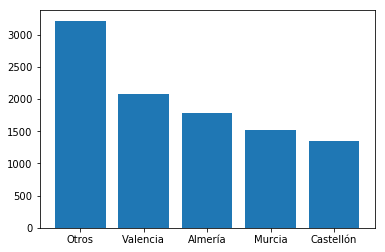

In [32]:
PlotValueCounts(v = df['PV_provincias'].value_counts())

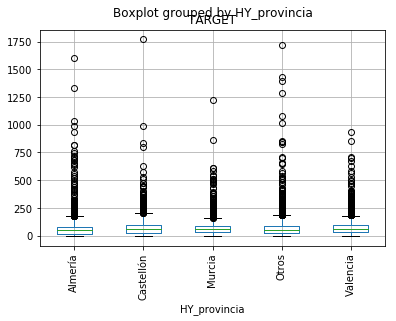

In [234]:
df.boxplot(column = 'TARGET', by = 'PV_provincias')
plt.xticks(rotation = 90)
plt.show()

De momento tomamos estas clases, aunque seguramente decidamos realizar otras agrupaciones en un futuro

# HY_descripcion

En esta variable se encuentran las descripciones de los usuarios que hacen del piso. Habiamos pensado contar la longitud de esta variable para determinar si un tipo de anuncio es largo, corto, o simplemente no tiene. Pero primero, veamos como es la variable:

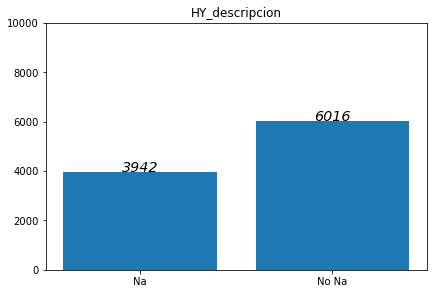

In [33]:
var = 'HY_descripcion'
datos = df[var]
PlotCantNaN(datos, var)

In [41]:
df[['HY_id','HY_descripcion']].groupby('HY_descripcion').count().sort_values('HY_id', ascending = False)

,HY_id
HY_descripcion,
"Plaza de garaje ubicada en la planta sótano de un edificio de manzana cerrada de cuatro plantas sobre rasantey dos sótanos bajo rasante, situada en el centro del municipio La Eliana, provincia de Valencia.",76
Promoción de plazas de garaje situada en un edificio de obra nueva. Se encuentran ubicada en la provincia de Valladolid.Disponen de una superficie de 13 m² aproximadamente.,71
"Plaza de garaje situada en la planta sótano de un edificio de siete plantas sobre rasante y dos plantas bajo rasante, situada en Calle de las Losas, en el municipio de Roquetas de Mar, provincia de Málaga. Cuenta con fácil acceso por carreteras, zona tranquila con un buen nivel de servicios como autobuses, supermercados, restauración, farmacias, centros educativos de enseñanza primaria y secundaria y centro de salud.",56
"Plaza de garaje situada en un edificio residencial del municipio de Ibi, provincia de Alicante. La plaza degaraje cuenta con una superficie útil aproximada entre 10 y 15m².",52
"Promoción de plazas de garaje, situadas en un edificio de obra nueva en la localidad de Logroño, en la provincia de La Rioja. \nLa plazas de garaje disponen de una superficie útil aproximada entre 11 m² y 23 m².",44
"Plaza de garaje situada en la planta sótano dentro del Edificio Residencial Velas Blancas, de siete alturas, promoción de obra nueva, ubicada en el municipio de Moncófar, provincia de Castellón.El edificio se encuentra ubicado, cerca de la costa, a 7 minutos del centro histórico del municipio. Cuenta con buenos accesos porcarretera.",39
"Garaje ubicado en la planta sótano de un edificio de oficinas de tres plantas sobre rasante con ascensor situado en la calle Castilla La Mancha, en la localidad de Antequera, provincia de Málaga.\nLas plazas de garaje miden aproximadamente entre 11 y 26 m² construidos.\n",39
"Plaza de garaje ubicada en la planta sótano de un edificio residencial de ocho plantas sobre rasante y dos bajo rasante, el cual dispone de ascensor. Se encuentra en la ciudad de Almería.Cuenta con fácil acceso a través de la autovía AL-12 y está cercano al Estadio de la Juventud ?Emilio Campra? y del Auditorio Municipal Maestro Padilla.Las plazas de garaje tienen una superficie construida aproximada de entre 25 m² hasta 55 m² y una superficie útil desde 13 m² hasta 27 m² aproximadamente.",34
"Piso de dos dormitorios y dos baños. La vivienda se encuentra en un edificio residencial de dos plantas sobrerasante, de obra nueva que no dispone de ascensor. Situada en el municipio de Chirivel, provincia de Almería.La vivienda se distribuye en cocina, salón-comedor, dos habitaciones y dos cuartos de baño. Dispone de piscina comunitaria y zonas verdes ajardiandas. Los pisos situados en planta baja cuentan con patio trasero y los ubicados en planta primera disponen de solárium privado. Cuenta con puerta de entrada normal. Ventanas aluminio lacado, ventanas correderas, persianas en pvc y acristalamiento con cámara. Carpintería interior en madera barnizada y armarios empotrados. Suelos de gres. Pintura plástica lisa en paredes, con pintura lisa en techos.Cocina y baño alicatados en azulejos. Cocina amueblada. Sanitarios completos. Grifería monomando. Dispone de Placas solares y rejas de seguridad. El inmueble se encuentra en una zona tranquila de la localidad, rodeadopor viviendas de similares características. El edificio tiene una antigüedad aproximada de unos siete años.Municipio perteneciente a la comarca de los Vélez, situado al norte de la provincia, limitando con la de Granada y en paisaje distinto al resto de la provincia. Su término municipal está incluido al Parque Natural de la Sierra de Marí­a, caracterizado por el clima mediterráneo continental, por sus montañas agrestes de materialescalizos y dolomí­ticos y por sus masas forestales de pinares. Ubicado en un paraje cercano al centro histórico de Chirivel, con buenos accesos por carretera, a pocos kilómetros del Parque Natural Sierra de María-Los Vélez.",32


Por lo que tenemos que hay descripciones que se repiten hasta 76 veces, lo cual resulta bastante misterioso.

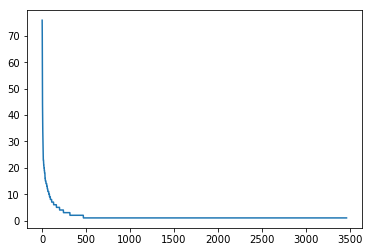

In [42]:
valores = datos.value_counts()
plt.plot(range(len(valores)), valores.values)
plt.show()

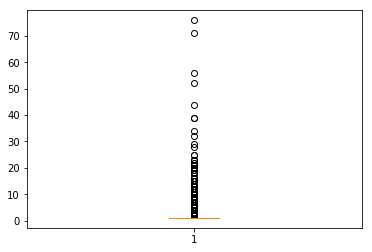

In [119]:
plt.boxplot(valores.values)
plt.show()

Comprobamos como son esos 76 registros de _**Plaza de garaje ubicada en la planta sótano de un edificio de manzana cerrada de cuatro plantas sobre rasantey dos sótanos bajo rasante, situada en el centro del municipio La Eliana, provincia de Valencia.**_

In [43]:
df[df.HY_descripcion=='Plaza de garaje ubicada en la planta sótano de un edificio de manzana cerrada de cuatro plantas sobre rasantey dos sótanos bajo rasante, situada en el centro del municipio La Eliana, provincia de Valencia.']

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
6737,6135877,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,12.64,22.0,0,...,6.38,1323.12,99.0,51.22,17,12.50,6.25,8,42,54.38
6738,6135190,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,12.65,22.0,0,...,NaN,NaN,NaN,NaN,1,0.00,0.00,34,34,37.00
6739,6136624,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,11.29,21.0,0,...,6.38,1323.12,99.0,51.22,11,14.29,28.57,2,38,160.09
6740,6136485,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,12.47,22.0,0,...,NaN,NaN,NaN,NaN,3,0.00,0.00,34,34,106.00
6741,6136770,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,19.98,34.0,0,...,6.38,1323.12,99.0,51.22,2,0.00,0.00,2,34,938.50
6742,6136235,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,19.98,55.0,0,...,6.38,1323.12,99.0,51.22,13,0.00,31.25,5,44,33.88
6743,6136632,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,12.64,22.0,0,...,NaN,NaN,NaN,NaN,2,0.00,50.00,23,34,39.50
6744,6136337,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,11.64,21.0,0,...,6.38,1323.12,99.0,51.22,3,0.00,0.00,2,34,28.00
6745,6136101,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,11.16,21.0,0,...,6.38,1323.12,99.0,51.22,2,0.00,0.00,8,34,38.00
6746,6136494,46183,Valencia,Plaza de garaje ubicada en la planta sótano de...,NaN,Garaje,1989.0,11.64,21.0,0,...,6.38,1323.12,99.0,51.22,6,0.00,25.00,1,34,23.67


Por lo que tenemos que lo único que varía de los anuncios son variaciones en los metros útiles. En el resto de variables coincide con bastante casualidad, aunque hay variables que tienen el mismo valor en unos registros mientras que en otros son NaN. Por lo que podemos utilizar este tipo de casualidad para rellenar los valores faltantes, pero antes vamos a ver cuantos NaN hay en cada columna.

In [44]:
df_76 = df[df.HY_descripcion=='Plaza de garaje ubicada en la planta sótano de un edificio de manzana cerrada de cuatro plantas sobre rasantey dos sótanos bajo rasante, situada en el centro del municipio La Eliana, provincia de Valencia.']

In [46]:
df_76.isnull().sum(axis = 0)

HY_id                               0
HY_cod_postal                       0
HY_provincia                        0
HY_descripcion                      0
HY_distribucion                    76
HY_tipo                             0
HY_antiguedad                       0
HY_metros_utiles                    0
HY_metros_totales                   0
HY_num_banos                        0
HY_cert_energ                      76
HY_num_terrazas                     0
HY_ascensor                         0
HY_trastero                         0
HY_num_garajes                      0
HY_precio                           0
HY_precio_anterior                 22
IDEA_area                          49
IDEA_poblacion                     49
IDEA_densidad                      49
IDEA_pc_1960                       49
IDEA_pc_1960_69                    49
IDEA_pc_1970_79                    49
IDEA_pc_1980_89                    49
IDEA_pc_1990_99                    49
IDEA_pc_2000_10                    49
IDEA_pc_come

In [52]:
df_76.HY_precio_anterior.value_counts()

5900.0     29
5700.0      8
6200.0      5
8600.0      2
6400.0      2
9100.0      1
12600.0     1
6100.0      1
14700.0     1
7300.0      1
8100.0      1
7800.0      1
5400.0      1
Name: HY_precio_anterior, dtype: int64

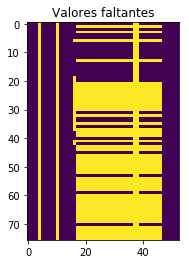

In [55]:
plt.imshow(df_76.isnull())
plt.title('Valores faltantes')
plt.show()

In [61]:
for col in df_76.columns:
    print(col, ': ', df_76[col].unique(), '||| NaNs: ', np.sum(df_76[col].isnull()))

HY_id :  [6135877 6135190 6136624 6136485 6136770 6136235 6136632 6136337 6136101
 6136494 6136634 6135859 6135353 6134695 6134536 6135538 6134243 6135929
 6135874 6133740 6134537 6133860 6134839 6134085 6134150 6135396 6135138
 6135839 6135177 6134771 6134904 6134214 6134719 6134522 6135769 6134567
 6135233 6134175 6135975 6134483 6134205 6134792 6134862 6134139 6135221
 6136227 6136644 6136819 6136638 6136486 6136203 6136637 6134559 6135456
 6134051 6133914 6134233 6134689 6134776 6134903 6134474 6135346 6134414
 6135139 6135807 6135983 6134508 6135876 6134450 6133864 6134705 6134151
 6135533 6137048 6134482 6135183] ||| NaNs:  0
HY_cod_postal :  ['46183'] ||| NaNs:  0
HY_provincia :  ['Valencia'] ||| NaNs:  0
HY_descripcion :  ['Plaza de garaje ubicada en la planta sótano de un edificio de manzana cerrada de cuatro plantas sobre rasantey dos sótanos bajo rasante, situada en el centro del municipio La Eliana, provincia de Valencia.'] ||| NaNs:  0
HY_distribucion :  [nan] ||| NaNs:  7

Y como era de esperar, todas las variables de IDEA tienen dos valores [Número, Nan]. Por lo que vamos a comprobar si eso se cumple para todos.

In [67]:
for i,descripcion in enumerate(df[['HY_id','HY_descripcion']].groupby('HY_descripcion').count().sort_values('HY_id', ascending = False).index):
    # Partimos el conjunto en los datos que tienen la misma dirección
    df_descripcion = df[df.HY_descripcion==descripcion]
    
    if df_descripcion.shape[0] == 1:
        break
    
    values = []
    for col in df_descripcion.columns:
        if 'IDEA' in col and col not in ['IDEA_ind_elasticidad', 'IDEA_ind_liquidez']:
            values.append(len(df_descripcion[col].unique()))
            
    if np.sum(np.array(values) == 2) == len(values):
        print(i,': Cumple')
    else:
        print(i,': No cumple')


0 : Cumple
1 : No cumple
2 : Cumple
3 : Cumple
4 : Cumple
5 : Cumple
6 : No cumple
7 : Cumple
8 : No cumple
9 : Cumple
10 : No cumple
11 : No cumple
12 : No cumple
13 : Cumple
14 : Cumple
15 : No cumple
16 : No cumple
17 : Cumple
18 : Cumple
19 : Cumple
20 : No cumple
21 : Cumple
22 : Cumple
23 : Cumple
24 : No cumple
25 : No cumple
26 : No cumple
27 : No cumple
28 : Cumple
29 : Cumple
30 : No cumple
31 : No cumple
32 : No cumple
33 : No cumple
34 : Cumple
35 : Cumple
36 : Cumple
37 : No cumple
38 : Cumple
39 : Cumple
40 : Cumple
41 : Cumple
42 : Cumple
43 : Cumple
44 : Cumple
45 : Cumple
46 : No cumple
47 : Cumple
48 : Cumple
49 : Cumple
50 : No cumple
51 : Cumple
52 : Cumple
53 : Cumple
54 : No cumple
55 : No cumple
56 : No cumple
57 : No cumple
58 : No cumple
59 : Cumple
60 : No cumple
61 : Cumple
62 : No cumple
63 : No cumple
64 : No cumple
65 : Cumple
66 : No cumple
67 : Cumple
68 : Cumple
69 : Cumple
70 : Cumple
71 : No cumple
72 : No cumple
73 : No cumple
74 : Cumple
75 : Cumple

Como vemos que todos no cumplen, vamos a ver que pasa con el segundo:

In [68]:
df_71 = df[df.HY_descripcion=='Promoción de plazas de garaje situada en un edificio de obra nueva. Se encuentran ubicada en la provincia de Valladolid.Disponen de una superficie de 13 m² aproximadamente.']
for col in df_71.columns:
    print(col, ': ', df_71[col].unique(), '||| NaNs: ', np.sum(df_71[col].isnull()))

HY_id :  [6031116 6031117 6031118 6031119 6031120 6031121 6031122 6031124 6031125
 6031126 6031128 6031129 6034493 6034494 6034495 6034498 6034499 6034500
 6034501 6034502 6034503 6034504 6034505 6034506 6034508 6034509 6034510
 6034512 6039817 6039818 6039819 6039820 6039821 6039822 6039823 6039824
 6039825 6039826 6039827 6039828 6039829 6039830 6039831 6039832 6039834
 6039835 6039836 6039837 6041394 6041395 6041396 6041397 6041398 6041399
 6041401 6041402 6041403 6041404 6041405 6041406 6041408 6041409 6041410
 6041412 6041413 6041414 6041415 6041416 6041417 6041418 6041419] ||| NaNs:  0
HY_cod_postal :  ['47015'] ||| NaNs:  0
HY_provincia :  ['Otros'] ||| NaNs:  0
HY_descripcion :  ['Promoción de plazas de garaje situada en un edificio de obra nueva. Se encuentran ubicada en la provincia de Valladolid.Disponen de una superficie de 13 m² aproximadamente.'] ||| NaNs:  0
HY_distribucion :  [nan] ||| NaNs:  71
HY_tipo :  ['Garaje'] ||| NaNs:  0
HY_antiguedad :  [  nan 2010.] ||| NaNs:

Avandonamos esta idea porque puede ser que los anunciantes hayan cogido otras descripciones como referencia.

#### Contando la longitud de las descripciones

Lo importante que tenemos que tener en cuenta es que un NaN en descripción implica que no la hay.

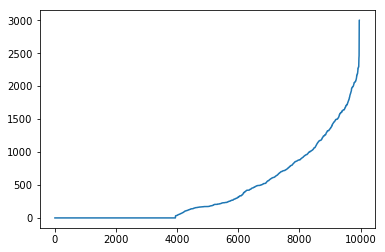

In [94]:
# Igualamos los NaN a carácteres vacíos
df.loc[df[var].isnull(),var] = ''

# Calculamos su longitud
df['PV_longitud_descripcion'] = df[var].apply(lambda x: len(x))

# Representamos nuestra nueva variable
plt.plot(range(df.shape[0]), df['PV_longitud_descripcion'].sort_values().values)
plt.show()

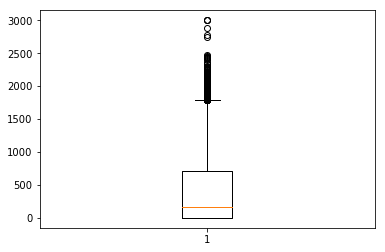

In [120]:
plt.boxplot(df['PV_longitud_descripcion'].values)
plt.show()

# HY_distribucion

Breve descripción de como está distribuido el inmueble

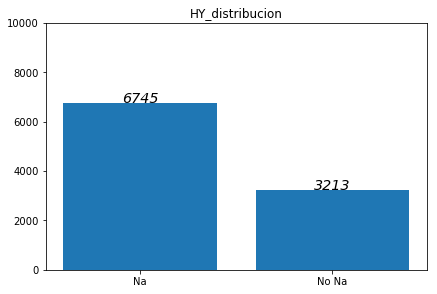

In [96]:
var = 'HY_distribucion'
datos = df[var]
PlotCantNaN(datos, var)

Tenemos una gran cantidad de NaNs, por lo que vamos a exxplorar a ver que pasa con esta variable.

In [97]:
df[var]

0                                                     NaN
1                                                     NaN
2                                           VIVIENDA-PISO
3                                                     NaN
4                                                     NaN
5       Se distribuye en recibidor, salón comedor, coc...
6       Se distribuye en salón comedor, cocina, lavade...
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14      La vivienda está compuesta de dos plantas. En ...
15      La vivienda se distribuye en tres plantas. La ...
16      La vivienda se compone de dos alturas  la plan...
17      La viv

In [100]:
df[df[var].isnull() == False]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion
2,6028502,03740,Otros,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48,226
5,6028514,30592,Murcia,Piso de dos dormitorios y baño en la tercera p...,"Se distribuye en recibidor, salón comedor, coc...",Piso,NaN,48.10,54.24,1,...,433.86,24.0,51.69,318,20.41,11.87,1,47,41.06,853
6,6028515,30592,Murcia,Piso de un dormitorio y baño en la tercera pla...,"Se distribuye en salón comedor, cocina, lavade...",Piso,NaN,48.05,55.90,1,...,433.86,24.0,51.69,39,4.55,18.07,2,46,43.17,847
14,6028533,29470,Otros,Chalet adosado de dos plantas que consta de cu...,La vivienda está compuesta de dos plantas. En ...,Chalet adosado,1989.0,90.93,109.00,1,...,NaN,NaN,0.00,1920,32.80,17.37,1,42,64.46,1128
15,6028534,46370,Valencia,Casa unifamiliar de tres plantas sobre rasante...,La vivienda se distribuye en tres plantas. La ...,Casa de pueblo,1997.0,452.16,528.91,2,...,583.77,54.0,51.05,896,30.94,14.94,1,47,71.25,2027
16,6028539,46800,Valencia,Casa unifamiliar de tres dormitorios y dos bañ...,La vivienda se compone de dos alturas la plan...,Casa de pueblo,1930.0,134.83,154.27,2,...,NaN,NaN,0.00,671,18.21,10.71,1,47,41.41,481
17,6028541,46724,Valencia,Chalet adosado de tres plantas con cuatro dorm...,La vivienda se distribuye en tres plantas. La ...,Chalet adosado,2006.0,190.55,217.37,2,...,525.00,6.0,50.41,677,11.64,14.15,1,47,62.55,940
18,6028544,46721,Valencia,Piso de dos dormitorios y un cuarto de baño ub...,La vivienda está distribuida en tres dormitori...,Piso,1969.0,82.11,90.32,1,...,335.00,6.0,51.79,241,6.52,5.19,1,47,45.39,775
19,6028545,46292,Valencia,Piso de cuatro dormitorios y dos baños situado...,"La vivienda consta de recibidor, salón-comedor...",Piso,2008.0,109.86,145.42,2,...,NaN,NaN,0.00,387,33.44,23.20,1,47,88.88,919
20,6028547,46293,Valencia,"Piso de tres dormitorios y dos baños, ubicado ...","Las viviendas constan de tres dormitorios, uno...",Piso,NaN,97.25,114.70,2,...,NaN,NaN,0.00,251,4.55,5.90,1,47,81.24,780


Por lo que realizamos una transformación similar a la del caso anterior:

In [101]:
# Igualamos los NaN a carácteres vacíos
df.loc[df[var].isnull(),var] = ''

# Calculamos su longitud
df['PV_longitud_distribucion'] = df[var].apply(lambda x: len(x))

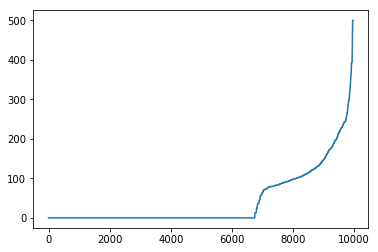

In [103]:
# Representamos nuestra nueva variable
plt.plot(range(df.shape[0]), df['PV_longitud_distribucion'].sort_values().values)
plt.show()

# HY_tipo

Tipo  de inmueble que se anuncia en la página.

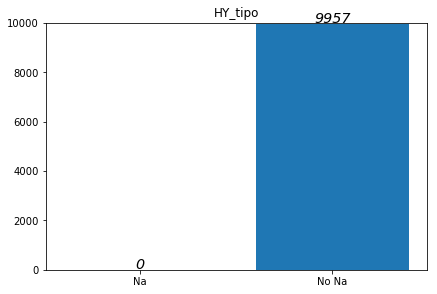

In [222]:
var = 'HY_tipo'
datos = df[var]
PlotCantNaN(datos, var)

Por lo que no tenemos NaNs. Veamos que aspecto tiene.

In [105]:
df[var]

0                     Garaje
1             Casa de pueblo
2                       Piso
3                     Garaje
4                     Garaje
5                       Piso
6                       Piso
7                      Local
8                     Garaje
9                     Garaje
10                    Garaje
11                    Garaje
12                    Garaje
13                    Garaje
14            Chalet adosado
15            Casa de pueblo
16            Casa de pueblo
17            Chalet adosado
18                      Piso
19                      Piso
20                      Piso
21            Casa de pueblo
22            Casa de pueblo
23                      Piso
24                      Piso
25            Chalet adosado
26                      Piso
27                      Piso
28                      Piso
29                      Piso
                ...         
9928    Chalet independiente
9929                    Piso
9930          Chalet adosado
9931          

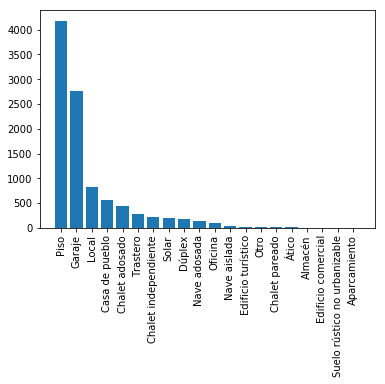

In [223]:
PlotValueCounts(df[var].value_counts(), rotation = 90)

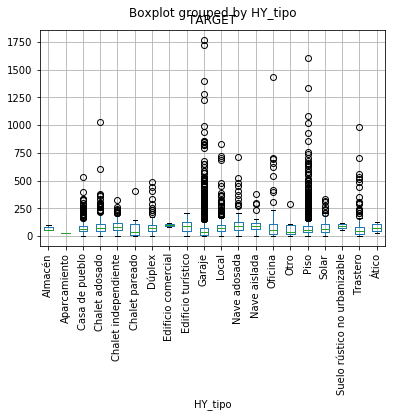

In [233]:
df.boxplot(column = 'TARGET', by = 'HY_tipo')
plt.xticks(rotation = 90)
plt.show()

Por lo que tenemos que la mayoría de los anuncios son de pisos o garajes. Es decir, tendremos que juntar las clases más minoritarias en _otros_ tal y como hicimos con _provincias_

# HY_antiguedad

Antigüedad del inmueble

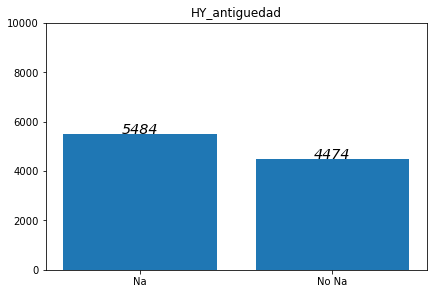

In [113]:
var = 'HY_antiguedad'
datos = df[var]
PlotCantNaN(datos, var)

Tenemos que esta vriable presenta más del 50% de los valores como NaN. Para arreglar esto planeamos utilizar las variables que indican el porcentaje de edificios con cierta edad construidos en la zona.

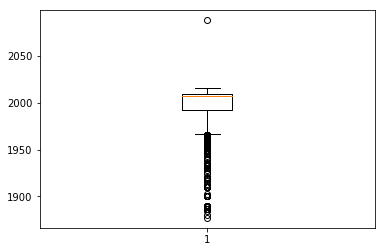

In [116]:
plt.boxplot(df[var].dropna().values)
plt.show()

Tenemos un Outlier bastante evidente, ya que no podemos tener un piso con una antigüedad mayor al 2019.

In [121]:
print('El piso outlier es del año {}'.format(df[var].max()))

El piso outlier es del año 2088.0


Dado que estamos en 2019, vamos a proceder a eliminar este valor fijandolo a _np.nan_

In [127]:
df.loc[df[var].idxmax(),var] = np.nan

Y volvemos a realizar el análisis anterior

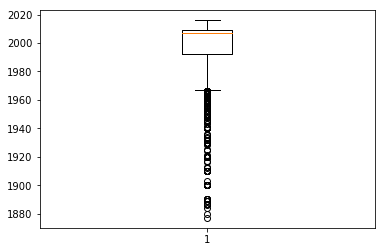

In [128]:
plt.boxplot(df[var].dropna().values)
plt.show()

In [129]:
print('El piso más reciente es del año {}'.format(df[var].max()))
print('El piso más antigüo es del año {}'.format(df[var].min()))

El piso más reciente es del año 2016.0
El piso más antigüo es del año 1877.0


Por lo que parece que ya tenemos unos años más decentes en nuestro dataset. La posible transformación que hagamos en está variable será discretizarla en cuatro categorías dependiendo de la antigüedad del piso.

# HY_metros_utiles y  HY_metros_totales

Dada la intima relación entre estas variables, realizaremos su análisis simultaneamente.

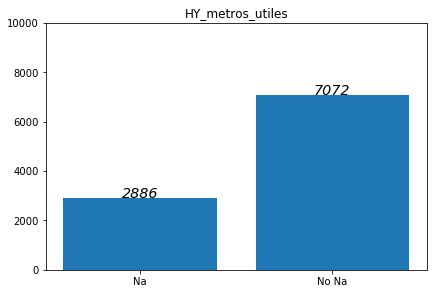

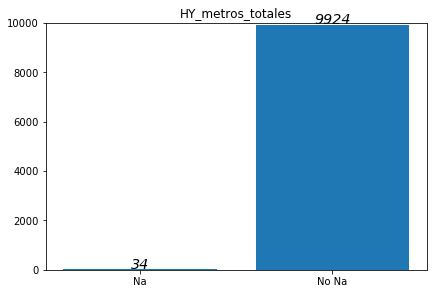

In [132]:
var1 = 'HY_metros_utiles'
datos = df[var1]
PlotCantNaN(datos, var1)

var2 = 'HY_metros_totales'
datos = df[var2]
PlotCantNaN(datos, var2)

Por lo que tenemos que disponemos de los metros totales en casi todos los registros pero no tenemos los metros útiles en la mayoría de ellos, por eso, una primera aproximación para completar los valores es simplemente igualar loos metros útiles a los totales.

In [133]:
# Obtenemos las posiciones de los valores faltantes een los metros útiles
posiciones_nans = df[var1].isnull()

# Rellenamos los Nans con los metros totales
df.loc[posiciones_nans,var1] = df.loc[posiciones_nans,var2]

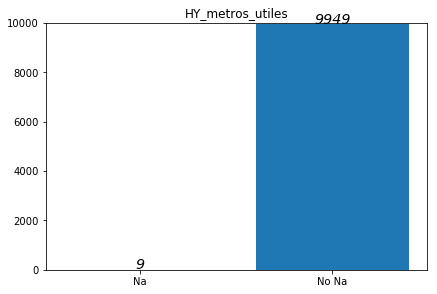

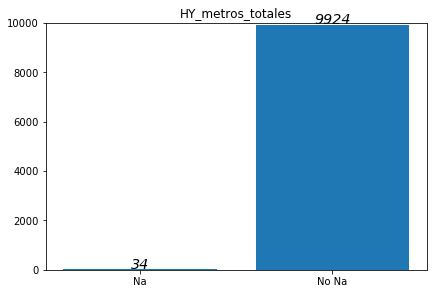

In [134]:
var1 = 'HY_metros_utiles'
datos = df[var1]
PlotCantNaN(datos, var1)

var2 = 'HY_metros_totales'
datos = df[var2]
PlotCantNaN(datos, var2)

Como ahora tenemos menos Nan en los metros útiles, por lo que utilizamos esta variable para rellenar metros totales.

In [135]:
# Obtenemos las posiciones de los valores faltantes een los metros útiles
posiciones_nans = df[var2].isnull()

# Rellenamos los Nans con los metros totales
df.loc[posiciones_nans,var2] = df.loc[posiciones_nans,var1]

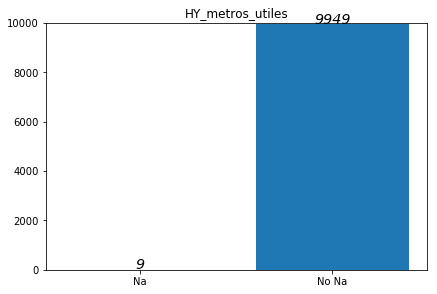

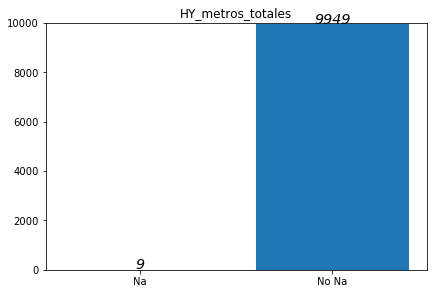

In [136]:
var1 = 'HY_metros_utiles'
datos = df[var1]
PlotCantNaN(datos, var1)

var2 = 'HY_metros_totales'
datos = df[var2]
PlotCantNaN(datos, var2)

Veamos que aspecto tienen esos 9 Nans

In [137]:
df[df[var2].isnull()]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
582,6031274,03502,Otros,Suelo urbano de forma poligonal situado en la ...,Terreno de superficie registral: 2000 m²\nUso ...,Solar,NaN,NaN,NaN,0,...,282.0,53.04,728,35.14,26.45,1,47,106.41,397,132
753,6031943,12540,Castellón,Local comercial de una planta situado en la lo...,El local consta de una planta que consta de 29...,Local,NaN,NaN,NaN,1,...,51.0,51.88,100,16.67,14.48,1,46,62.92,2439,64
2033,6037690,12005,Castellón,,,Garaje,NaN,NaN,NaN,0,...,60.0,50.74,29,20.00,27.25,9,47,20.71,0,0
3498,6077186,46164,Valencia,Terreno urbano con forma cuadrada y orografía ...,Terreno de superficie registral: 97 m².\nUso d...,Solar,NaN,NaN,NaN,0,...,30.0,51.47,39,22.22,26.62,1,39,49.91,463,172
5163,6079044,35240,Otros,,,Garaje,NaN,NaN,NaN,0,...,NaN,NaN,1,0.00,0.00,42,42,647.00,0,0
7096,6136395,24392,Otros,Terreno de forma rectangular situado en el sec...,Terreno de superficie registral: 49680 m²\nUso...,Solar,NaN,NaN,NaN,0,...,12.0,50.15,168,21.62,17.51,3,47,95.21,329,134
7551,6521194,04230,Almería,,,Local,NaN,NaN,NaN,0,...,93.0,51.40,62,22.22,30.18,3,46,23.53,0,0
8026,6747334,28810,Otros,,,Solar,NaN,NaN,NaN,0,...,18.0,52.93,682,33.06,40.72,1,47,118.13,0,0
9140,6934517,46469,Valencia,Terreno urbano con forma rectangular y orograf...,Terreno de superficie registral: 1.009 m²\nUso...,Solar,NaN,NaN,NaN,0,...,105.0,51.92,18,40.00,50.00,28,46,27.40,433,161


In [170]:
for i in df[df[var2].isnull()].HY_distribucion:
    print('********\n',i)

********
 Terreno de superficie registral: 2000 m²
Uso dominante: Residencial
Tipo: Viviendas unifamiliares/plurifamiliares en manzana cerrada
********
 El local consta de una planta que consta de 296 m² construidos. 
********
 
********
 Terreno de superficie registral: 97 m².
Uso dominante: Residencial.
Uso compatible: Comercial.
Uso prohibido: Industrial
Tipo: Viviendas plurifamiliares en manzana cerrada.
********
 
********
 Terreno de superficie registral: 49680 m²
Uso dominante: Residencial
Tipo: Viviendas unifamiliares/plurifamiliares en edificio aislado
********
 
********
 Terreno de superficie registral: 1.009 m²
Uso dominante: Residencial
Usos prohibidos: Industrial
Tipo: Viviendas plurifamiliares/unifamiliares en manzana cerrada


In [142]:
df.loc[8026]

HY_id                              6747334
HY_cod_postal                        28810
HY_provincia                         Otros
HY_descripcion                            
HY_distribucion                           
HY_tipo                              Solar
HY_antiguedad                          NaN
HY_metros_utiles                       NaN
HY_metros_totales                      NaN
HY_num_banos                             0
HY_cert_energ                          NaN
HY_num_terrazas                          0
HY_ascensor                              0
HY_trastero                              0
HY_num_garajes                           0
HY_precio                            58300
HY_precio_anterior                   79900
IDEA_area                           288.26
IDEA_poblacion                        3139
IDEA_densidad                        10.89
IDEA_pc_1960                           NaN
IDEA_pc_1960_69                        NaN
IDEA_pc_1970_79                        NaN
IDEA_pc_198

In [152]:
df.loc[df.IDEA_poblacion == 3139]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
8026,6747334,28810,Otros,,,Solar,NaN,NaN,NaN,0,...,18.0,52.93,682,33.06,40.72,1,47,118.13,0,0
8027,6747446,28810,Otros,,,Solar,NaN,357.0,357.0,0,...,18.0,52.93,173,48.83,62.86,2,44,91.83,0,0


In [161]:
df.loc[df.IDEA_poblacion == 3139].loc[8026,'HY_antiguedad':]-df.loc[df.IDEA_poblacion == 3139].loc[8027,'HY_antiguedad':]

HY_antiguedad                        NaN
HY_metros_utiles                     NaN
HY_metros_totales                    NaN
HY_num_banos                           0
HY_cert_energ                        NaN
HY_num_terrazas                        0
HY_ascensor                            0
HY_trastero                            0
HY_num_garajes                         0
HY_precio                           6200
HY_precio_anterior                  8500
IDEA_area                              0
IDEA_poblacion                         0
IDEA_densidad                          0
IDEA_pc_1960                         NaN
IDEA_pc_1960_69                      NaN
IDEA_pc_1970_79                      NaN
IDEA_pc_1980_89                      NaN
IDEA_pc_1990_99                      NaN
IDEA_pc_2000_10                      NaN
IDEA_pc_comercio                     NaN
IDEA_pc_industria                    NaN
IDEA_pc_oficina                      NaN
IDEA_pc_otros                        NaN
IDEA_pc_residenc

In [167]:
df.loc[df.IDEA_poblacion == 3139,['HY_metros_utiles','HY_metros_totales']] = 357.0

Como la población es la misma, y la mayoría de variables coinciden, podemos suponer que los metros cuadrados son los mismos.

In [172]:
df.loc[2033]

HY_id                                6037690
HY_cod_postal                          12005
HY_provincia                       Castellón
HY_descripcion                              
HY_distribucion                             
HY_tipo                               Garaje
HY_antiguedad                            NaN
HY_metros_utiles                         NaN
HY_metros_totales                        NaN
HY_num_banos                               0
HY_cert_energ                            NaN
HY_num_terrazas                            0
HY_ascensor                                0
HY_trastero                                0
HY_num_garajes                             0
HY_precio                              21500
HY_precio_anterior                       NaN
IDEA_area                             128.39
IDEA_poblacion                          4801
IDEA_densidad                           37.4
IDEA_pc_1960                            0.03
IDEA_pc_1960_69                         0.03
IDEA_pc_19

In [173]:
df.loc[df.IDEA_poblacion == 4801]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
2032,6037689,12005,Castellón,,,Garaje,1959.0,20.8,20.8,0,...,60.0,50.74,33,12.50,33.85,9,47,65.31,0,0
2033,6037690,12005,Castellón,,,Garaje,NaN,NaN,NaN,0,...,60.0,50.74,29,20.00,27.25,9,47,20.71,0,0
3798,6081347,12003,Castellón,"Casa unifamiliar adosada de tres dormitorios, ...",La vivienda se distribuye en dos plantas con t...,Casa de pueblo,1940.0,128.0,128.0,2,...,60.0,50.74,1610,46.69,21.79,1,47,72.02,859,106


La idea de coompletarlos manualmente es una posible alternativa, pero esperemos a completar el resto

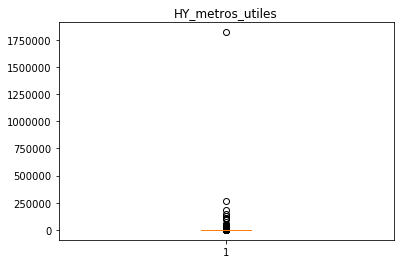

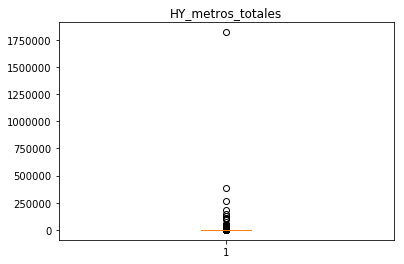

In [184]:
plt.boxplot(df[var1].dropna().values)
plt.title(var1)
plt.show()

plt.boxplot(df[var2].dropna().values)
plt.title(var2)
plt.show()

Veamos que pintas tiene ese outlier

In [189]:
df[df[var2] == df[var2].max()]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
9904,7008680,50270,Otros,,,Solar,NaN,1820000.0,1820000.0,0,...,9.0,51.1,27,22.5,13.89,39,42,166.8,0,0


In [190]:
df.loc[9904]

HY_id                               7008680
HY_cod_postal                         50270
HY_provincia                          Otros
HY_descripcion                             
HY_distribucion                            
HY_tipo                               Solar
HY_antiguedad                           NaN
HY_metros_utiles                   1.82e+06
HY_metros_totales                  1.82e+06
HY_num_banos                              0
HY_cert_energ                           NaN
HY_num_terrazas                           0
HY_ascensor                               0
HY_trastero                               0
HY_num_garajes                            0
HY_precio                          2.33e+06
HY_precio_anterior                      NaN
IDEA_area                           9057.98
IDEA_poblacion                         2922
IDEA_densidad                          0.32
IDEA_pc_1960                           0.32
IDEA_pc_1960_69                        0.32
IDEA_pc_1970_79                 

Tenemos que pueede ser un solar e venta en terreno urbanizable, pero decidimos eliminar dicho registro por concordancia con los datos

In [202]:
df = df.drop([9904])

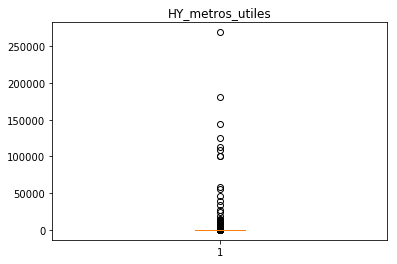

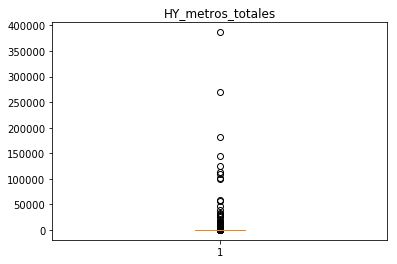

In [203]:
plt.boxplot(df[var1].dropna().values)
plt.title(var1)
plt.show()

plt.boxplot(df[var2].dropna().values)
plt.title(var2)
plt.show()

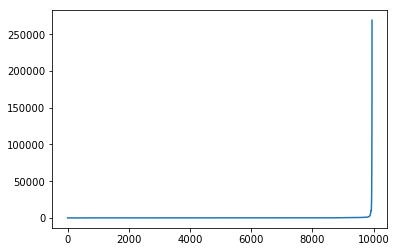

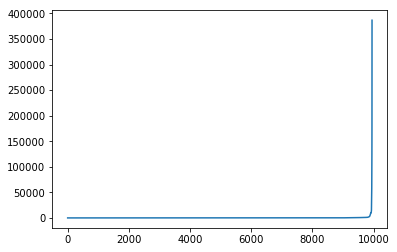

In [206]:
plt.plot(df[var1].sort_values().values)
plt.show()

plt.plot(df[var2].sort_values().values)
plt.show()

Veamos cuales son los mínimos y los máximos de cada variable.

In [281]:
print('El mínimo de metros útiles se encuentra en {} m2 y el máximo en {} m2'.format(df[var1].min(), df[var1].max()))
print('El mínimo de metros totales se encuentra en {} m2 y el máximo en {} m2'.format(df[var2].min(), df[var2].max()))

El mínimo de metros útiles se encuentra en 0.0 m2 y el máximo en 269116.0 m2
El mínimo de metros totales se encuentra en 0.0 m2 y el máximo en 386730.0 m2


In [284]:
print('Tenemos un total de {} pisos con 0 metros útiles'.format(np.sum(df[var1] == 0)))
print('Tenemos un total de {} pisos con 0 metros totales'.format(np.sum(df[var2] == 0)))

Tenemos un total de 252 pisos con 0 metros útiles
Tenemos un total de 2 pisos con 0 metros totales


In [285]:
df[df[var1] == 0]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
717,6031785,04120,Almería,,,Piso,NaN,0.0,8.00,1,...,NaN,NaN,22,9.09,13.18,34,47,31.21,0,0
813,6032110,46600,Valencia,Local situado en la planta baja de un edificio...,Se distribuye en una planta con una estancia d...,Local,1999.0,0.0,150.62,0,...,NaN,NaN,71,71.43,47.67,33,47,94.69,1014,83
1583,6035930,30500,Murcia,Piso de dos dormitorios y un cuarto de baño. S...,La vivienda está distribuida en dos dormitorio...,Piso,1960.0,0.0,63.65,1,...,24.0,49.87,139,25.00,18.14,41,47,44.37,861,102
1643,6036085,30009,Murcia,Piso de cuatro dormitorios y un baño ubicado e...,"Vivienda distribuida en hall, cuatro habitacio...",Piso,1962.0,0.0,97.00,1,...,NaN,NaN,46,34.85,37.24,36,47,166.52,1182,82
1644,6036090,12190,Castellón,,,Casa de pueblo,NaN,0.0,317.00,2,...,NaN,NaN,66,33.33,8.72,40,47,32.60,0,0
1679,6036191,03570,Otros,,,Local,NaN,0.0,213.92,0,...,NaN,NaN,3,0.00,33.33,38,43,6.67,0,0
1686,6036215,24004,Otros,"Local de 76,46 distribuido en dos estancias, d...",,Local,NaN,0.0,76.46,0,...,NaN,NaN,115,32.14,21.07,34,47,63.37,80,0
1698,6036279,12006,Castellón,LOCAL EN LA PLANTA BAJA EN UN EDIFICIO DESEIS ...,,Local,NaN,0.0,75.16,0,...,NaN,NaN,66,24.26,31.37,34,47,150.88,81,0
1996,6037570,04740,Almería,,,Piso,NaN,0.0,94.23,1,...,NaN,NaN,21,14.29,26.19,36,47,146.93,0,0
2101,6037897,12181,Castellón,,,Casa de pueblo,NaN,0.0,118.00,2,...,NaN,NaN,44,14.29,13.27,36,47,337.34,0,0


In [286]:
df[df[var2] == 0]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
5134,6078729,08758,Otros,Terreno urbano con forma irregular y orografía...,"Terreno de superficie registral: 8.274,54 m² \...",Solar,NaN,0.0,0.0,0,...,NaN,NaN,185,28.75,24.73,19,47,84.60,459,124
7148,6135038,04000,Almería,,,Otro,NaN,0.0,0.0,0,...,NaN,NaN,4,0.00,0.00,40,46,290.33,0,0


Tenemos que en el caso de los metros útiles, simplemente los igualamos a los metros totales, ya que se tratará de un error a la hora de introducir los datos como datos faltantes. Mientras que en el caso de metros totales hay dos registros, uno que la información de los metros cuadrados se encuentra en la distribución, y otro que no da información alguna (será eliminado)

In [291]:
# Cambiamos los útiles por totales
df.loc[df[var1] == 0, var1] = df.loc[df[var1] == 0, var2]

# Añadimos el valor faltante
df.loc[5134,[var1, var2]] = 8274
# Eliminamos el registro que no aporta metros
df = df.drop([7148])

Ahora comprobemos si se cumple la relación $metros\_utiles < metros\_totales$

In [296]:
print('Hay {} pisos que incumplen con la lógica'.format(np.sum(df[var2] - df[var1] < 0)))

Hay 2 pisos que incumplen con la lógica


In [297]:
df[df[var2] - df[var1] < 0]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
5887,6081832,12592,Castellón,,,Piso,NaN,99.0,75.0,1,...,72.0,51.37,5,0.00,0.00,12,47,28.62,0,0
7094,6136387,03688,Otros,,,Solar,NaN,135.0,112.0,0,...,21.0,50.96,111,27.78,40.73,17,40,303.65,0,0


Realizamos una permutación de las columnas ya que puede tratarse un error a la hora de introducir los datos.

In [305]:
indices = df[var2] - df[var1] < 0
# Tomámos los valores 
utiles = df.loc[indices, var1]
totales = df.loc[indices, var2]

# Los reemplazamos
df.loc[indices, var1] = totales
df.loc[indices, var2] = utiles

# HY_num_banos

Número de baños del inmueble

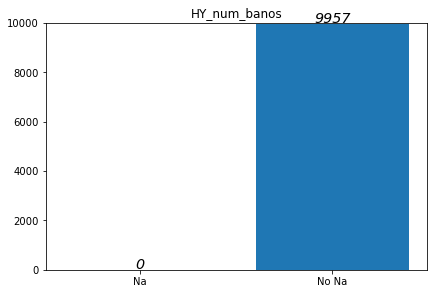

In [207]:
var = 'HY_num_banos'
datos = df[var]
PlotCantNaN(datos, var)

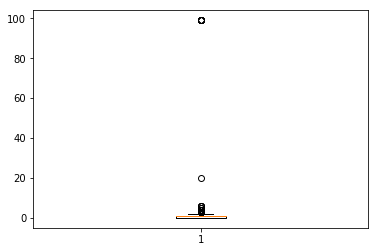

In [208]:
plt.boxplot(df[var].values)
plt.show()

In [211]:
df.loc[df[var].idxmax()]

HY_id                                         6078405
HY_cod_postal                                   07702
HY_provincia                                    Otros
HY_descripcion                                       
HY_distribucion                                      
HY_tipo                            Edificio turístico
HY_antiguedad                                     NaN
HY_metros_utiles                               242.13
HY_metros_totales                              242.13
HY_num_banos                                       99
HY_cert_energ                                     NaN
HY_num_terrazas                                     0
HY_ascensor                                         0
HY_trastero                                         0
HY_num_garajes                                      0
HY_precio                                      217000
HY_precio_anterior                             224000
IDEA_area                                         NaN
IDEA_poblacion              

Tenemos que el "Outlier" es un edificio turístico en venta. Tiene sentido que tenga 99 baños, pero cuando discreticemos la variable en categorías este valor sería irrelevante, ya que entrará dentro de la clase de _+3Baños_

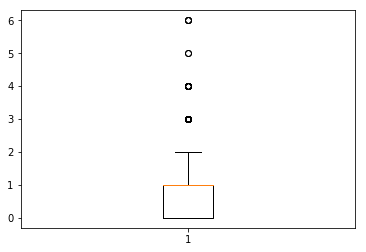

In [213]:
plt.boxplot(df.loc[df[var]<=10][var])
plt.show()

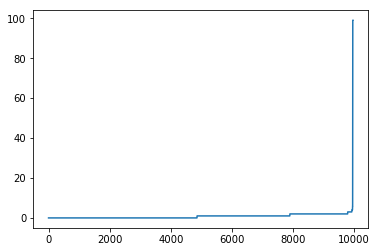

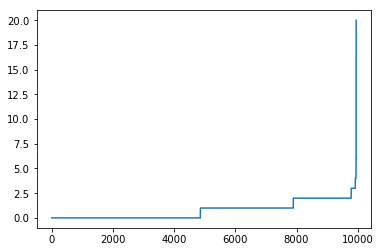

In [217]:
plt.plot(df[var].sort_values().values)
plt.show()

plt.plot(df.loc[df[var]<=20,var].sort_values().values)
plt.show()

# HY_cert_energ

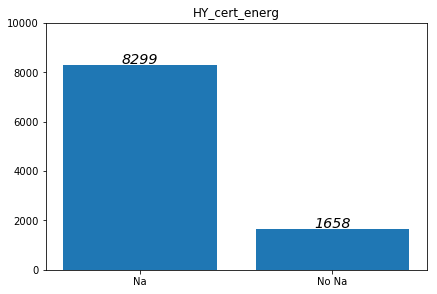

In [224]:
var = 'HY_cert_energ'
datos = df[var]
PlotCantNaN(datos, var)

Tenemos que casi a mayoría de elementos son Nans. Pero como tenemos unos cuantos que no lo son vamos a ver como su distribución.

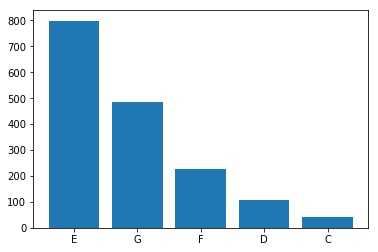

In [225]:
PlotValueCounts(df[var].value_counts())

Una posible solución para los Nans es añadis una nueva clase _NO_, la cual indicará que no tiene certificado energético.

In [227]:
df.loc[df[var].isnull(), var] = 'No'

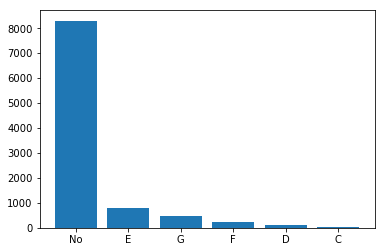

In [228]:
PlotValueCounts(df[var].value_counts())

Veamos como se distribuye la variable respuest respecto a las distintas clases de nuestra variable.

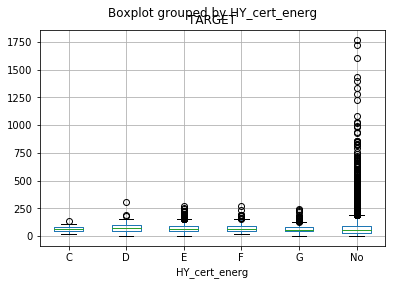

In [229]:
df.boxplot(column = 'TARGET', by = 'HY_cert_energ')
plt.show()

# HY_num_terrazas

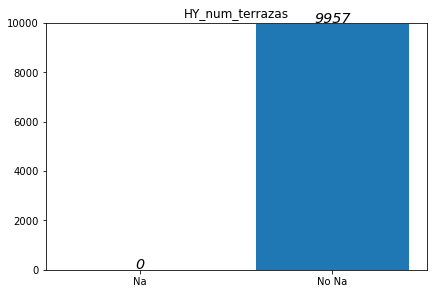

In [235]:
var = 'HY_num_terrazas'
datos = df[var]
PlotCantNaN(datos, var)

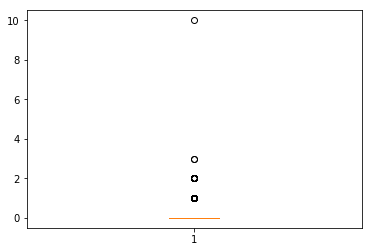

In [236]:
plt.boxplot(df[var].values)
plt.show()

Veamos que pinta tiene ese edificio con 10 terrazas:

In [237]:
df.loc[df[var] == 10]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
8436,6819076,04830,Almería,,,Chalet adosado,NaN,260.8,326.0,20,...,NaN,NaN,1223,25.27,12.93,23,47,90.21,0,0


Por lo visto, este chalet tiene unos 20 baños y 10 terrazas. Nuevamente realizaremos una clasificación en 0, 1, o más de 1 terrazas, por lo que no nos afectará.

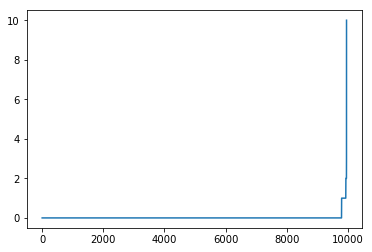

In [240]:
plt.plot(df[var].sort_values().values)
plt.show()

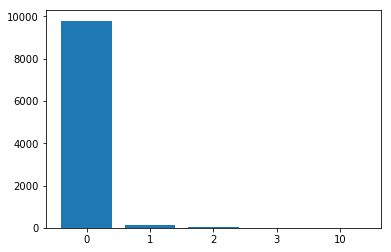

In [241]:
PlotValueCounts(df[var].value_counts())

# HY_ascensor

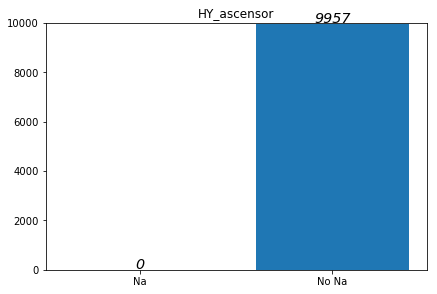

In [244]:
var = 'HY_ascensor'
datos = df[var]
PlotCantNaN(datos, var)

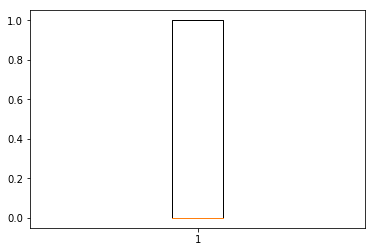

In [245]:
plt.boxplot(df[var].values)
plt.show()

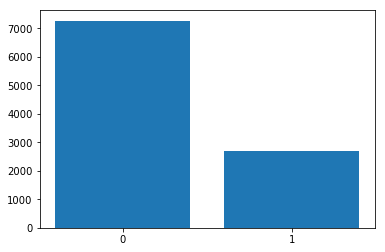

In [246]:
PlotValueCounts(df[var].value_counts())

# HY_trastero

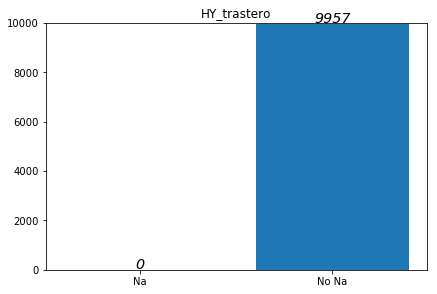

In [247]:
var = 'HY_trastero'
datos = df[var]
PlotCantNaN(datos, var)

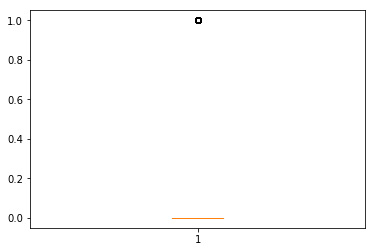

In [248]:
plt.boxplot(df[var].values)
plt.show()

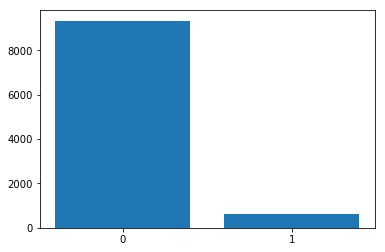

In [249]:
PlotValueCounts(df[var].value_counts())

# HY_num_garajes

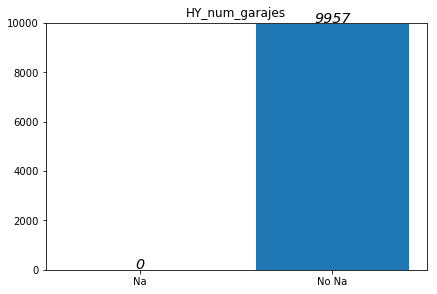

In [250]:
var = 'HY_num_garajes'
datos = df[var]
PlotCantNaN(datos, var)

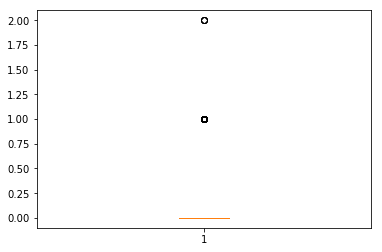

In [251]:
plt.boxplot(df[var].values)
plt.show()

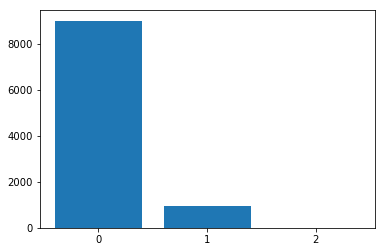

In [252]:
PlotValueCounts(df[var].value_counts())

Veamos cuantos registros tienen 2 garajes.

In [253]:
df[var].value_counts()

0    8995
1     958
2       4
Name: HY_num_garajes, dtype: int64

Por lo que al final crearemos una clase binaria:
+ 0 no garaje
+ 1 tiene garaje

In [255]:
df.loc[df[var]==2, var] = 1

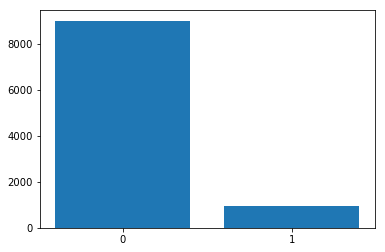

In [256]:
PlotValueCounts(df[var].value_counts())

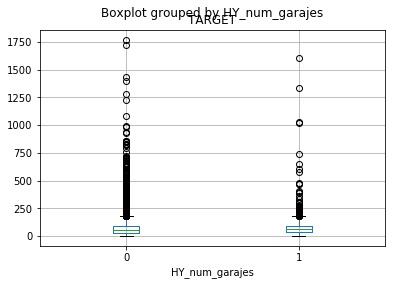

In [258]:
df.boxplot(column = 'TARGET', by = 'HY_num_garajes')
plt.show()

# HY_precio

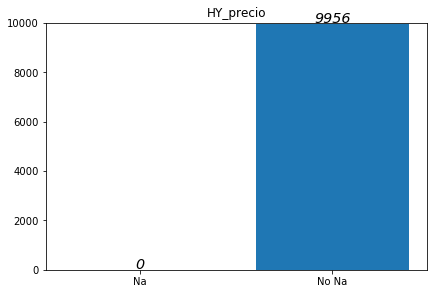

In [314]:
var = 'HY_precio'
datos = df[var]
PlotCantNaN(datos, var)

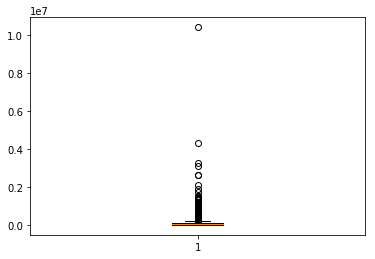

In [277]:
plt.boxplot(df[var].values)
plt.show()

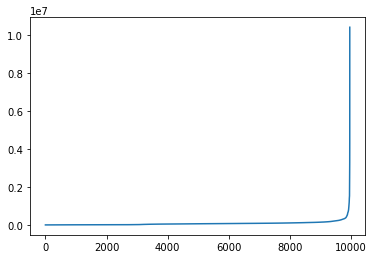

In [263]:
plt.plot(range(df.shape[0]), df[var].sort_values().values)
plt.show()

In [278]:
print('El piso más barato es: {}'.format(df[var].min()))
print('El piso más caro es: {}'.format(df[var].max()))

El piso más barato es: 0.0
El piso más caro es: 10400000.0


Parece un poco extraño que tengamos un piso por solo 0€.

In [315]:
print('Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 200€'.format(np.sum(df[var]==0), np.sum(df[var]<=200)))

Tenemos un total de 14 pisos con un precio de 0€. Y un potal de 14 pisos por menos de 200€


In [316]:
df.loc[df[var]==0, 'HY_metros_totales':]

,HY_metros_totales,HY_num_banos,HY_cert_energ,HY_num_terrazas,HY_ascensor,HY_trastero,HY_num_garajes,HY_precio,HY_precio_anterior,IDEA_area,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
48,99.00,0,No,0,0,0,0,0.0,0.0,20141.99,...,147.0,51.59,241,15.28,18.20,1,47,92.82,929,0
717,8.00,1,No,0,0,0,0,0.0,0.0,NaN,...,NaN,NaN,22,9.09,13.18,34,47,31.21,0,0
2219,35.10,0,No,0,0,0,0,0.0,1000.0,7577.32,...,15.0,50.25,38,12.50,9.58,1,45,40.00,92,0
2863,190.00,2,No,0,0,0,0,0.0,64000.0,NaN,...,NaN,NaN,22,0.00,5.13,34,47,121.08,0,0
2955,12976.00,0,No,0,0,0,0,0.0,1000.0,7577.32,...,15.0,50.25,33,0.00,4.29,1,44,156.05,92,0
4445,75.65,1,No,0,0,0,0,0.0,0.0,NaN,...,NaN,NaN,4,25.00,25.00,39,46,403.25,0,0
6832,1030.90,0,No,0,1,0,0,0.0,0.0,2248.71,...,27.0,51.73,1194,55.14,30.69,14,47,123.14,3000,500
7060,14751.98,0,No,0,0,0,0,0.0,30833100.0,NaN,...,NaN,NaN,4,33.33,66.67,36,39,3.83,0,0
7146,52.00,0,No,0,0,0,0,0.0,3773700.0,NaN,...,NaN,NaN,1,0.00,100.00,42,42,0.00,0,0
7160,386730.00,0,No,0,0,0,0,0.0,1.0,NaN,...,NaN,NaN,1,0.00,100.00,47,47,0.00,0,0


Eliminamos todos los elementos que tienen como precio y precio anterior 0. Y ya que estamos eliminamos el inmueble que tiene de precio 30 millones y el de 3 millones. También investigamos el piso con 1€ de precio anterior. Por lo que veamos como son estos precios.

In [332]:
print('Precio: Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 100€'.format(np.sum(df['HY_precio']==0), np.sum(df['HY_precio']<=100)))
print('Precio anterior: Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 100€'.format(np.sum(df['HY_precio_anterior']==0), np.sum(df['HY_precio_anterior']<=100)))

Precio: Tenemos un total de 14 pisos con un precio de 0€. Y un potal de 14 pisos por menos de 100€
Precio anterior: Tenemos un total de 6 pisos con un precio de 0€. Y un potal de 9 pisos por menos de 100€


Por lo que eliminamos los elementos que tienen ambos precios nulos. 

In [347]:
# Eliminamos las filas que tienen como precios 0.
v = df[['HY_precio', 'HY_precio_anterior']].apply(lambda x: x[0] == 0 and x[1] == 0, axis = 1)
df = df[v == False]


In [349]:
print('Precio: Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 100€'.format(np.sum(df['HY_precio']==0), np.sum(df['HY_precio']<=100)))
print('Precio anterior: Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 100€'.format(np.sum(df['HY_precio_anterior']==0), np.sum(df['HY_precio_anterior']<=100)))

Precio: Tenemos un total de 8 pisos con un precio de 0€. Y un potal de 8 pisos por menos de 100€
Precio anterior: Tenemos un total de 0 pisos con un precio de 0€. Y un potal de 3 pisos por menos de 100€


In [353]:
df.loc[df['HY_precio_anterior'] <= 100, 'HY_precio':]

,HY_precio,HY_precio_anterior,IDEA_area,IDEA_poblacion,IDEA_densidad,IDEA_pc_1960,IDEA_pc_1960_69,IDEA_pc_1970_79,IDEA_pc_1980_89,IDEA_pc_1990_99,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
7160,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0.00,100.00,47,47,0.00,0,0
7189,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13,12.50,25.00,21,41,95.72,0,0
7258,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27,13.46,39.49,22,41,57.19,0,0


Por lo que los otros tres valores tienen un precio de 1€. Por lo que eliminamos dichos registros también

In [355]:
v = df[['HY_precio', 'HY_precio_anterior']].apply(lambda x: x[0] <= 100 and x[1] <= 100, axis = 1)
df = df[v == False]

In [356]:
print('Precio: Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 100€'.format(np.sum(df['HY_precio']==0), np.sum(df['HY_precio']<=100)))
print('Precio anterior: Tenemos un total de {} pisos con un precio de 0€. Y un potal de {} pisos por menos de 100€'.format(np.sum(df['HY_precio_anterior']==0), np.sum(df['HY_precio_anterior']<=100)))

Precio: Tenemos un total de 5 pisos con un precio de 0€. Y un potal de 5 pisos por menos de 100€
Precio anterior: Tenemos un total de 0 pisos con un precio de 0€. Y un potal de 0 pisos por menos de 100€


Comprobemos esos 5 inmuebles.

In [357]:
df.loc[df['HY_precio'] <= 100, 'HY_precio':]

,HY_precio,HY_precio_anterior,IDEA_area,IDEA_poblacion,IDEA_densidad,IDEA_pc_1960,IDEA_pc_1960_69,IDEA_pc_1970_79,IDEA_pc_1980_89,IDEA_pc_1990_99,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
2219,0.0,1000.0,7577.32,1128.0,0.15,0.07,0.07,0.01,0.09,0.2,...,15.0,50.25,38,12.50,9.58,1,45,40.00,92,0
2863,0.0,64000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22,0.00,5.13,34,47,121.08,0,0
2955,0.0,1000.0,7577.32,1128.0,0.15,0.07,0.07,0.01,0.09,0.2,...,15.0,50.25,33,0.00,4.29,1,44,156.05,92,0
7060,0.0,30833100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,33.33,66.67,36,39,3.83,0,0
7146,0.0,3773700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0.00,100.00,42,42,0.00,0,0


Por lo que fijaremos como precio actual para esos valores el precio anterior.

In [359]:
df.loc[df['HY_precio'] <= 100, 'HY_precio'] = df.loc[df['HY_precio'] <= 100, 'HY_precio_anterior']

# HY_precio_anterior

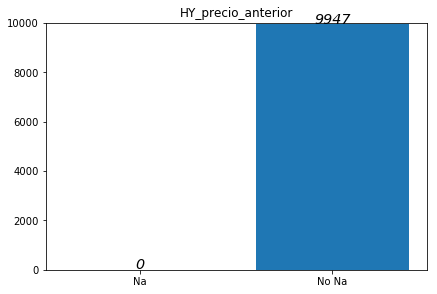

In [360]:
var = 'HY_precio_anterior'
datos = df[var]
PlotCantNaN(datos, var)

Como tenemos Nans en esta variable, son fáciles de rellenar, ya que podemos poner como precio anterior el precio actual.

In [361]:
df.loc[df[var].isnull(),var] = df.loc[df[var].isnull(),'HY_precio']

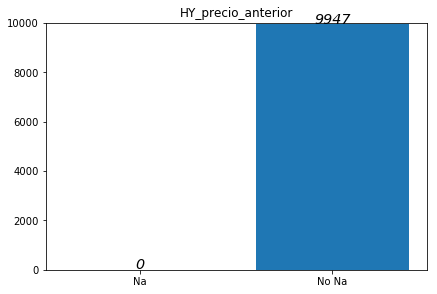

In [362]:
PlotCantNaN(datos, var)

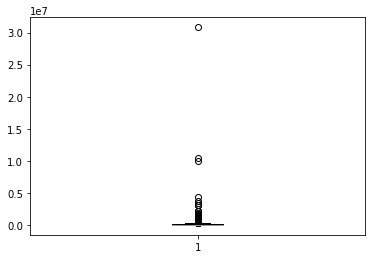

In [363]:
plt.boxplot(df[var].values)
plt.show()

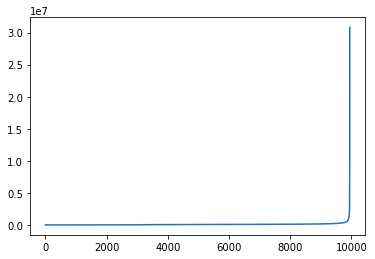

In [364]:
plt.plot(range(df.shape[0]), df[var].sort_values().values)
plt.show()

Como en el caso anterior miramos que no haya precios de 0

In [365]:
df[var].sort_values()

7150         700.0
7857         700.0
7861         700.0
7874         700.0
7875         700.0
7876         700.0
7877         700.0
7878         700.0
7000         700.0
7880         700.0
7879         700.0
8994         800.0
5945         800.0
5543         800.0
1621         900.0
1934         900.0
3949         900.0
1715        1000.0
1714        1000.0
7881        1000.0
7882        1000.0
2993        1000.0
7873        1000.0
2955        1000.0
1267        1000.0
7867        1000.0
2219        1000.0
7866        1000.0
7019        1100.0
5540        1100.0
           ...    
1679     1160000.0
4967     1197400.0
7        1230000.0
2573     1320000.0
4128     1340000.0
4246     1350000.0
8531     1370000.0
7888     1398000.0
4937     1410000.0
764      1459000.0
1606     1510000.0
3301     1530000.0
3546     1532300.0
2789     1550000.0
2060     1630000.0
3786     1690000.0
7826     1710000.0
1433     1930000.0
8734     2100000.0
7096     2100000.0
2167     2130000.0
4482     303

Por lo que tras esta pequeña limpieza tenemos unos precios más razonables

# Checkpoint: 

Para evitar problemas de memoria, Guardamos el dataframe y continuamos la exploración de las varables en el Notebock *EDA\_IDEA.ipybn*

In [368]:
df.to_csv('df_HY_limpias.csv', sep = '|', encoding='utf-8', index = False)

Comprobamos como va el nivel de Nans.